In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

util.set_sns_style(style='dark')

In [3]:
srcdir = '/home/julianarhee/Documents/projects/plume-tracking/data'

fnames = os.listdir(srcdir)
fnames

['heatmaps_0.p', 'heatmaps_45.p', 'T_plume.p']

In [4]:
import _pickle as pkl

In [7]:
fpath = os.path.join(srcdir, fnames[-1])
print(fpath)
with open(fpath, 'rb') as f:
    dfdict = pkl.load(f)
    

/home/julianarhee/Documents/projects/plume-tracking/data/T_plume.p


In [8]:
dfdict.keys()

dict_keys(['03042022-140837_T_plume.log', '03042022-153138_T_plume_Fly2_T1.log', '03042022-155820_T_plume_Fly2_T2.log', '03042022-180206_T_plume_Fly3.log', '03042022-183431_T_Plume_Fly4.log', '03042022-190904_T_plume_Fly5.log', '03072022-135441_T_Plume_Fly6.log', '03072022-154741T_Plume_Fly7_T1(fictrac lost tracking).log', '03072022-160439_T_Plume_Fly7_t2.log', '03072022-174233_T_Plume_Fly8.log', '03142022-162226_t_plume_Fly9_t1(lost tracking).log', '03142022-162816_T_plume_Fly9_T2.log', '03142022-190502_T_plume_Fly10(lost tracking).log'])

In [9]:
dfdict['03042022-140837_T_plume.log']['data'].columns

Index(['mfc1_stpt', 'mfc2_stpt', 'mfc3_stpt', 'led1_stpt', 'led2_stpt',
       'sig_status', 'ft_posx', 'ft_posy', 'ft_frame', 'ft_error', 'ft_roll',
       'ft_pitch', 'ft_yaw', 'ft_heading', 'instrip', 'timestamp',
       'motor_step_command', 'seconds'],
      dtype='object')

# zero trajectories

In [32]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [101]:
#dfdict['03042022-140837_T_plume.log']['data']

d_list = []
for fi, (fn, df_) in enumerate(dfdict.items()):
    if 'instrip' not in df_['data'].columns:
        print(fn)
    df_['data']['filename'] = fn
    df0 = df_['data'].copy()
    
        # convert timestamp str into datetime obj, convert to sec
    datefmt  = '%m/%d/%Y-%H:%M:%S.%f'
    df0['time'] = df0['timestamp'].apply(lambda x: \
                            time.mktime(x.timetuple()) \
                            + x.microsecond / 1E6 ).astype('float')
#     df0['time'] = df0['timestamp'].apply(lambda x: \
#                             time.mktime(datetime.strptime(x, datefmt).timetuple()) \
#                             + datetime.strptime(x, datefmt).microsecond / 1E6 ).astype('float')
    df0['rel_time'] = df0['time'] - df0['time'].iloc[0]
    # convert datestr
    df0['date'] = df0['timestamp'].apply(lambda s: \
            int(s.date().strftime("%Y%m%d")))

    # convert ft_heading to make it continuous and in range (-pi, pi)
    if 'ft_heading' in df0.columns:
        p = util.unwrap_and_constrain_angles(df0['ft_heading'].values)
        df0['ft_heading'] = p #-p 
    
    df0 = butil.process_df(df0, bout_thresh=0.25)
    df_z = putil.zero_trajectory(df0)
    d_ = pd.DataFrame({
        'ft_posx': df_z['ft_posx'],
        'ft_posy': df_z['ft_posy'],
        'ft_heading': df_z['ft_heading'],
        'instrip': df_z['instrip'],
        'boutnum': df_z['boutnum'],
        'filename': fn,
        'fly_id': fi
    })
    d_list.append(d_)
df = pd.concat(d_list, axis=0)


[bout 5]  too short outstrip, should be IN
[bout 6]  too short instrip, should be OUT
[bout 7]  too short outstrip, should be IN
[bout 9]  too short outstrip, should be IN
[bout 10]  too short instrip, should be OUT
[bout 11]  too short outstrip, should be IN
[bout 12]  too short instrip, should be OUT
[bout 14]  too short instrip, should be OUT
[bout 15]  too short outstrip, should be IN
[bout 16]  too short instrip, should be OUT
[bout 17]  too short outstrip, should be IN
[bout 18]  too short instrip, should be OUT
[bout 20]  too short instrip, should be OUT
[bout 21]  too short outstrip, should be IN
[bout 22]  too short instrip, should be OUT
[bout 23]  too short outstrip, should be IN
[bout 24]  too short instrip, should be OUT
[bout 25]  too short outstrip, should be IN
[bout 26]  too short instrip, should be OUT
[bout 27]  too short outstrip, should be IN
[bout 29]  too short outstrip, should be IN
[bout 30]  too short instrip, should be OUT
[bout 31]  too short outstrip, shoul

[bout 9]  too short outstrip, should be IN
[bout 18]  too short instrip, should be OUT
[bout 30]  too short instrip, should be OUT
[bout 38]  too short instrip, should be OUT
[bout 39]  too short outstrip, should be IN
[bout 40]  too short instrip, should be OUT
[bout 59]  too short outstrip, should be IN
[bout 60]  too short instrip, should be OUT
[bout 78]  too short instrip, should be OUT
[bout 79]  too short outstrip, should be IN
[bout 32]  too short instrip, should be OUT
[bout 3]  too short outstrip, should be IN
[bout 4]  too short instrip, should be OUT
[bout 6]  too short instrip, should be OUT
[bout 9]  too short outstrip, should be IN
[bout 16]  too short instrip, should be OUT
[bout 17]  too short outstrip, should be IN
[bout 27]  too short outstrip, should be IN
[bout 28]  too short instrip, should be OUT
[bout 60]  too short instrip, should be OUT
[bout 66]  too short instrip, should be OUT
[bout 80]  too short instrip, should be OUT
[bout 82]  too short instrip, should 

In [102]:
file_lut = dict((fi, fn) for fi, fn in enumerate(df['filename'].unique()))

<IPython.core.display.Javascript object>


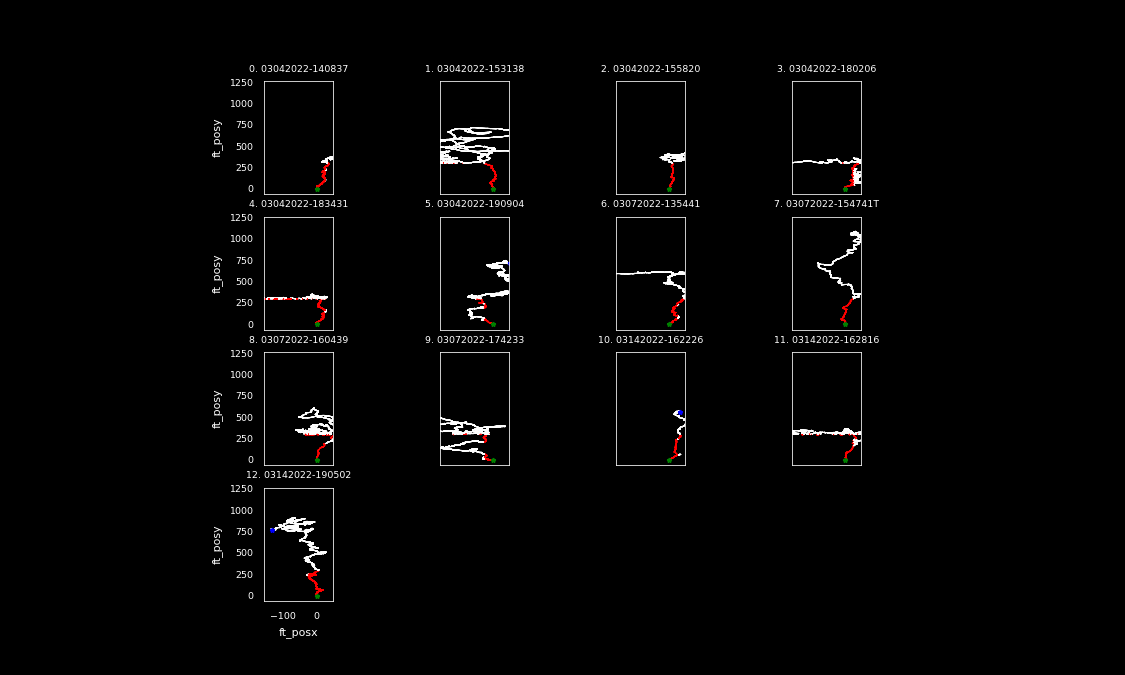

In [103]:
#putil.plot_array_of_trajectories(df, nr=3, nc=4, title='fly_id')
nr=4
nc=4
fig, axn = pl.subplots(nr, nc, figsize=(10,6), sharex=True, sharey=True)
for fi, fn in file_lut.items(): #fi, (fn, df_) in enumerate(df.groupby('filename')):
    df_ = df[df['filename']==fn].copy()
    ax=axn.flat[fi]
    butil.plot_trajectory(df_, ax =ax)
    ax.set_aspect(0.25)
    ax.legend_.remove()
    title='{}. {}'.format(fi, fn.split('_')[0])
    ax.set_title(title, fontsize=6)
for i in np.arange(fi+1, nr*nc):
    ax=axn.flat[i]
    ax.axis('off')

In [104]:
et_ixs = [3, 4, 8, 11]
ets = [file_lut[i] for i in et_ixs]
ets

['03042022-180206_T_plume_Fly3.log',
 '03042022-183431_T_Plume_Fly4.log',
 '03072022-160439_T_Plume_Fly7_t2.log',
 '03142022-162816_T_plume_Fly9_T2.log']

03042022-183431_T_Plume_Fly4.log


<IPython.core.display.Javascript object>


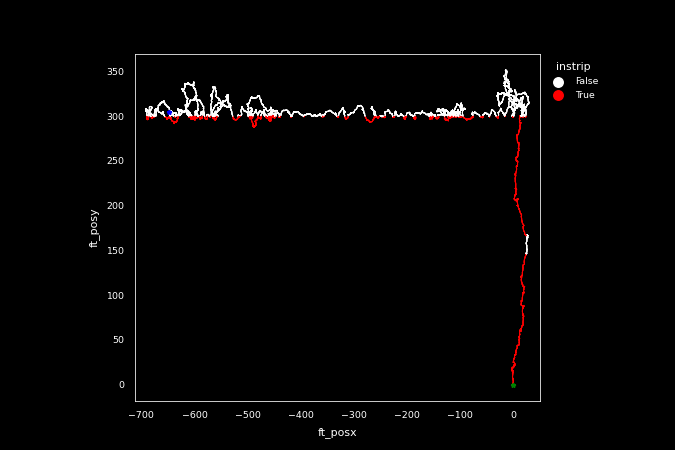

<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [105]:
fn = file_lut[4]
print(fn)
df_ = df[df['filename']==fn].copy()
fig, ax = pl.subplots()
butil.plot_trajectory(df_, ax=ax)

In [106]:
y_thresh = 300
d_ = df_[df_['ft_posy']>=y_thresh].copy()
d_

,ft_posx,ft_posy,ft_heading,instrip,boutnum,filename,fly_id
5741,13.235393,300.054050,0.542502,True,4,03042022-183431_T_Plume_Fly4.log,4
5742,13.302485,300.095939,0.566877,True,4,03042022-183431_T_Plume_Fly4.log,4
5743,13.377029,300.172475,0.588839,True,4,03042022-183431_T_Plume_Fly4.log,4
5744,13.207265,300.160038,0.535007,True,4,03042022-183431_T_Plume_Fly4.log,4
5745,13.189361,300.106351,0.524436,True,4,03042022-183431_T_Plume_Fly4.log,4
...,...,...,...,...,...,...,...
48048,-648.370497,304.091124,-0.437752,False,125,03042022-183431_T_Plume_Fly4.log,4
48049,-648.374554,304.101310,-0.438520,False,125,03042022-183431_T_Plume_Fly4.log,4
48050,-648.409435,304.074180,-0.431280,False,125,03042022-183431_T_Plume_Fly4.log,4
48051,-648.408785,304.096986,-0.441496,False,125,03042022-183431_T_Plume_Fly4.log,4


In [121]:

d_['odor_heading'] = d_['ft_heading'] - np.pi/2
p = util.unwrap_and_constrain_angles(d_['odor_heading'].values)
d_['odor_heading'] = p #-p 

In [122]:
d_['odor_heading']

5741    -1.028294
5742    -1.003919
5743    -0.981958
5744    -1.035789
5745    -1.046360
           ...   
48048   -2.008549
48049   -2.009316
48050   -2.002077
48051   -2.012293
48052   -2.027243
Name: odor_heading, Length: 35597, dtype: float64

In [123]:
d_['ft_heading'].min(), d_['ft_heading'].max()

(-3.141590616242186, 3.1415421399786005)

In [124]:
d_['odor_heading'].min(), d_['odor_heading'].max()

(-3.1415628063732832, 3.1415924855058037)

<IPython.core.display.Javascript object>


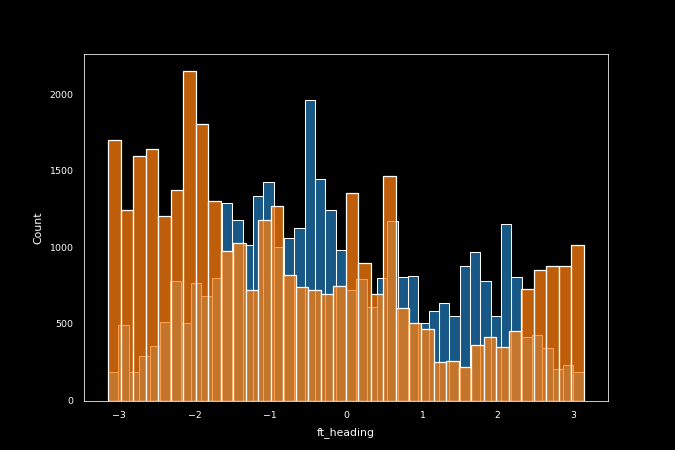

<AxesSubplot: xlabel='ft_heading', ylabel='Count'>

In [128]:
fig, ax = pl.subplots()
sns.histplot(data=d_, x='ft_heading', ax=ax)
sns.histplot(data=d_, x='odor_heading', ax=ax)

In [129]:
-160+90

-70

In [11]:
import scipy as sp

In [12]:
max_nframes = df.groupby('filename')['ft_posy'].count().max()

d_list=[]
for fi, (fn, df_) in enumerate(df.groupby('filename')):
    #up_ = traj.upsample_bout_trajectories(df_, npoints=max_nframes)
    x = df_['ft_posx'].values
    y = df_['ft_posy'].values
    t = np.arange(len(df_))
    t_common = np.linspace(t[0], t[-1], max_nframes)
    fx = sp.interpolate.interp1d(t, x)
    fy = sp.interpolate.interp1d(t, y)

    interpx =fx(t_common)
    interpy = fy(t_common)
    d_ = pd.DataFrame({
        'ft_posx': interpx,
        'ft_posy': interpy,
        'filename': fn,
        'fly_id': fi
    })    
    d_list.append(d_)


In [13]:
updf = pd.concat(d_list, axis=0)
updf.groupby('filename').count()

,ft_posx,ft_posy,fly_id
filename,,,
03042022-140837_T_plume.log,115876,115876,115876
03042022-153138_T_plume_Fly2_T1.log,115876,115876,115876
03042022-155820_T_plume_Fly2_T2.log,115876,115876,115876
03042022-180206_T_plume_Fly3.log,115876,115876,115876
03042022-183431_T_Plume_Fly4.log,115876,115876,115876
03042022-190904_T_plume_Fly5.log,115876,115876,115876
03072022-135441_T_Plume_Fly6.log,115876,115876,115876
03072022-154741T_Plume_Fly7_T1(fictrac lost tracking).log,115876,115876,115876
03072022-160439_T_Plume_Fly7_t2.log,115876,115876,115876


<IPython.core.display.Javascript object>


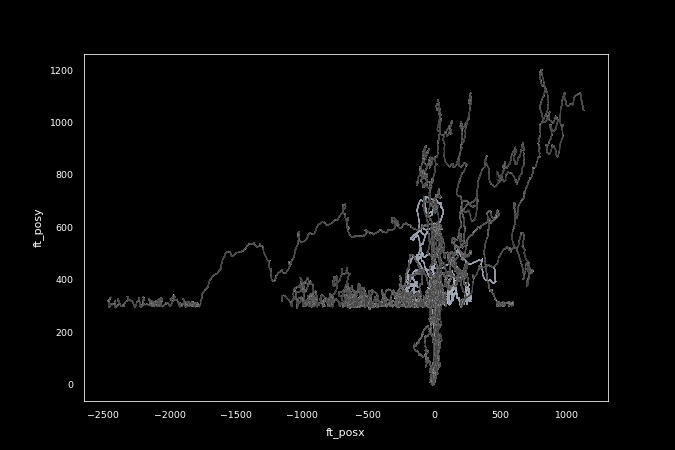

In [14]:
fig, ax= pl.subplots()
for fn, df_ in df.groupby('filename'):
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.3, color='w', ax=ax,
                   hue='fly_id', palette='bone', legend=0)

<IPython.core.display.Javascript object>


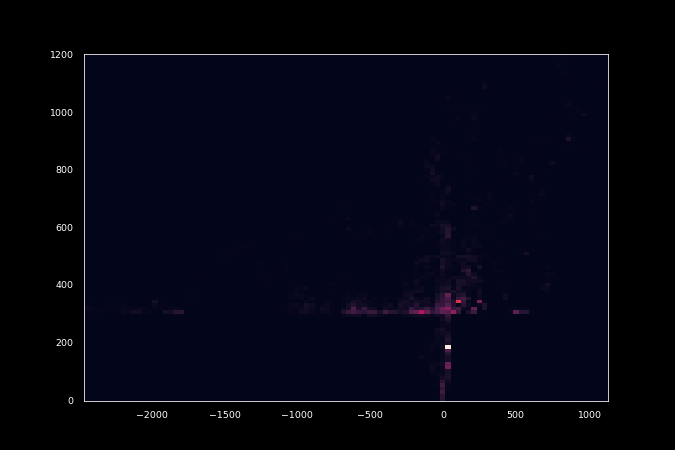

In [15]:
fig, ax = pl.subplots()
h, xe, ye, img = ax.hist2d(df['ft_posx'], df['ft_posy'], bins=100)

In [16]:
df.shape

(548349, 4)

In [17]:
d_list = []
for i, (xi, yi) in enumerate(zip(xe[0:-1], ye[0:-1])):
    startix, endix = xi, xe[i+1]
    curr_n_x = df[(df['ft_posx']>=startix) & (df['ft_posx']<endix)]['filename'].nunique()
    startix, endix = yi, ye[i+1]
    curr_n_y = df[(df['ft_posy']>=startix) & (df['ft_posy']<endix)]['filename'].nunique()
    
    d_ = pd.DataFrame({
        'edge': ['x', 'y'],
        'edge_value': [xi, yi],
        'n_flies': [curr_n_x, curr_n_y],
        'index': [i, i]
    }, index=[i, i])
    
    d_list.append(d_)
cnts = pd.concat(d_list).reset_index(drop=True)
    

In [21]:
cnts.head()

,edge,edge_value,n_flies,index
0,x,-2463.419578,1,0
1,y,-1.084950,13,0
2,x,-2427.481683,1,1
3,y,10.941865,13,1
4,x,-2391.543789,1,2


<IPython.core.display.Javascript object>


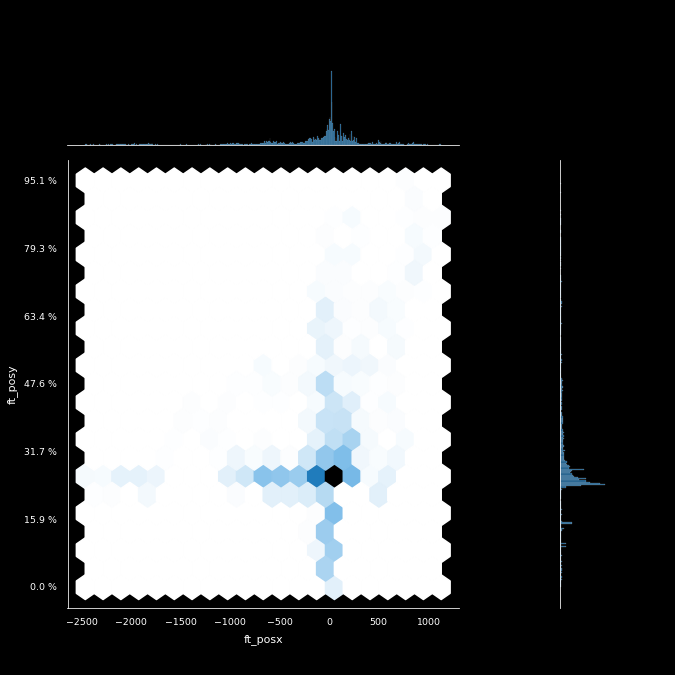

/tmp/ipykernel_930869/4234369947.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])


In [20]:
kdeplot = sns.jointplot(data=df, x="ft_posx", y="ft_posy", kind="hex",
              joint_kws=dict(gridsize=20))
             #marginal_kws=dict(bins=1000, fill=False))
# make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
# # make new ax object for the cbar
# cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
# pl.colorbar(cax=cbar_ax)

pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks])

pl.show()